In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
import requests
from io import StringIO

orig_url='https://drive.google.com/file/d/1NsnL45UxkYHbaj-SdkS_VhhAhcbR0M8a/view?usp=sharing"'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
lead_df = pd.read_csv(csv_raw)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [24]:
lead_df.shape

(9240, 37)

In [25]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [26]:
#checking for null values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
#checking null percentage
round((lead_df.isnull().sum()/len(lead_df.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
lead_df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000,17.000000,20.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000


__We have select in many columns which are as good as NULL value so lets find out in which columns we have it__

In [9]:
#finding colums which contain select 
lead_df[lead_df=='Select'].any()

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

In [10]:
col_select=['Specialization','How did you hear about X Education','Lead Profile','City']
for i in col_select:
    lead_df.loc[lead_df[i]=='Select',i]=np.nan

In [11]:
#lets check the number of rows we have which will have null values more than 50%
len(lead_df[lead_df.isnull().sum(axis=1) > 37*0.5])

0

__We have no such rows where we have more than half of the values as NULL so not deleting anything__

In [12]:
#checking for duplicate rows
#checking if there is any duplicate rows and dropping it
lead_df.drop_duplicates(keep='first',inplace=True)
lead_df.shape

(9240, 37)

__There are no duplicate rows present in the dataframe__

In [13]:
#Lets again check our null values percentage
round((lead_df.isnull().sum()/len(lead_df.index))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
lead_df['Country'].isnull().sum()

2461

In [15]:
lead_df.loc[lead_df['Country'].isnull(),'City'].value_counts()

Mumbai                         211
Thane & Outskirts               80
Other Cities                    55
Other Cities of Maharashtra     43
Other Metro Cities              15
Tier II Cities                   2
Name: City, dtype: int64

In [16]:
#Lets drop the columns which have null values more than 30 %
cols_drop=['Specialization','How did you hear about X Education','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
lead_df.drop(cols_drop,axis=1,inplace=True)

In [17]:
lead_df.shape

(9240, 27)

In [18]:
#Lets again check our null values percentage
round((lead_df.isnull().sum()/len(lead_df.index))*100,3)

Prospect ID                                       0.000
Lead Number                                       0.000
Lead Origin                                       0.000
Lead Source                                       0.390
Do Not Email                                      0.000
Do Not Call                                       0.000
Converted                                         0.000
TotalVisits                                       1.483
Total Time Spent on Website                       0.000
Page Views Per Visit                              1.483
Last Activity                                     1.115
Country                                          26.634
What is your current occupation                  29.113
What matters most to you in choosing a course    29.318
Search                                            0.000
Magazine                                          0.000
Newspaper Article                                 0.000
X Education Forums                              

__Imputing the null values in the variables with corresponding method__
- Lead Source - Mode (categorical)
- TotalVisits - Also mode ( Although it is a numerical but number of visit cant be decimal, so no mean and median)
- Page Views Per Visit - mean
- Last Activity - mode
- Country - mode
- What is your current occupation - mode
- What matters most to you in choosing a course - mode



In [19]:
#Imputing the null values in the dataset 
lead_df.loc[lead_df['Lead Source'].isnull(),'Lead Source'] = lead_df['Lead Source'].mode()[0]
lead_df.loc[lead_df['TotalVisits'].isnull(),'TotalVisits'] = lead_df['TotalVisits'].mode()[0]
lead_df.loc[lead_df['Page Views Per Visit'].isnull(),'Page Views Per Visit'] = lead_df['Page Views Per Visit'].mean()
lead_df.loc[lead_df['Last Activity'].isnull(),'Last Activity'] = lead_df['Last Activity'].mode()[0]
lead_df.loc[lead_df['Country'].isnull(),'Country'] = lead_df['Country'].mode()[0]
lead_df.loc[lead_df['What is your current occupation'].isnull(),'What is your current occupation'] = lead_df['What is your current occupation'].mode()[0]
lead_df.loc[lead_df['What matters most to you in choosing a course'].isnull(),'What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].mode()[0]

In [20]:
#Lets again check our null values percentage
round((lead_df.isnull().sum()/len(lead_df.index))*100,3)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [21]:
# As prospect ID and lead ID are both lead identifiers and both are unique numbers so lets drop 'Prospect ID' and we will keep 
# 'Lead Number' for now

lead_df.drop(['Prospect ID'],axis=1,inplace=True)

In [22]:
lead_df['Average time on a page']=lead_df['Total Time Spent on Website']/lead_df['Page Views Per Visit']*lead_df['TotalVisits']

In [23]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 27 columns):
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9240 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9240 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9240 non-null float64
Last Activity                                    9240 non-null object
Country                                          9240 non-null object
What is your current occupation                  9240 non-null object
What matters most to you in choosing a course    9240 

In [24]:
#We have some null values in newly create feature and that is zero because of zwro pages visited and or zoero visit . SO imputing
#the null with zero
lead_df.fillna(0,inplace=True)

In [25]:
#changing the data type of lead number
lead_df['Lead Number']=lead_df['Lead Number'].astype('object')

__As we do not have any null values lets continue with EDA__

## EDA

__We can derive a new variable "Avergage time spend on a page' from the above numerical__
- Total number of page views = Page Views Per Visit * TotalVisits
    - Avergage time spend on a page = Total Time Spent on Website/Total number of page views

In [26]:
def univariate_cat(df):
    dtype_cat=['category','object']
    col_names=list(df.select_dtypes(include=dtype_cat).columns)
    col_names.remove('Lead Number')
    
    for columns in col_names:
        
        sns.set(style="whitegrid")
        fig = plt.figure(figsize=(8, 3))
        ax = df[columns].value_counts().plot(kind='barh')
        for i, v in enumerate(df[columns].value_counts()):
            ax.text(v, i, " "+str(round((v/df.shape[0])*100))+'%', color='grey', verticalalignment='center',fontweight='bold')
        plt.title("Distribution of {}".format(columns), fontsize=16)
        ax.yaxis.grid(False)
   
        plt.show()

In [27]:
def univariate_num(df):
    from scipy.stats import norm
    dtype_num=['float64','int32','int64']
    col_names=df.select_dtypes(include=dtype_num).columns
    for columns in col_names:
        sns.set(style="whitegrid")
        plt.figure(figsize=(11,4))
        plt.subplot(121)
        plt.title(f'Distplot of {columns}')
        sns.distplot(df[columns].dropna(),fit=norm,kde=False)

        plt.subplot(122)
        plt.title(f'Boxplot  of {columns}')
        sns.boxplot(y=df[columns].dropna())
        plt.show()

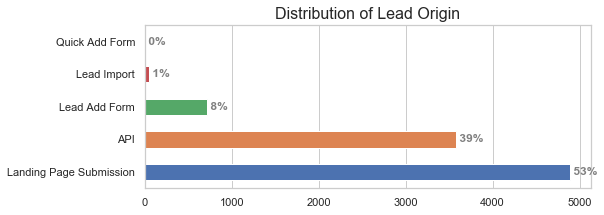

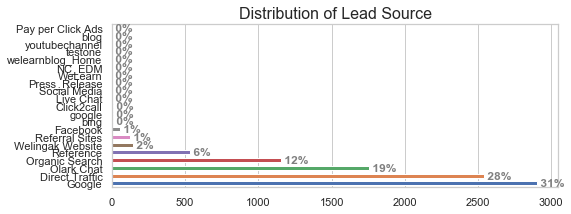

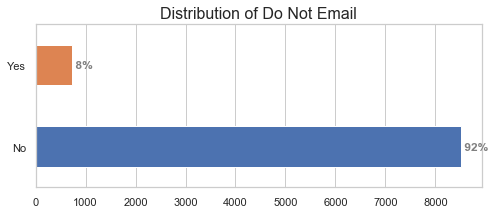

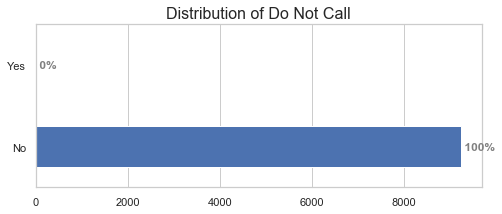

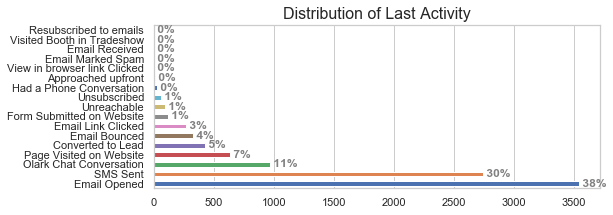

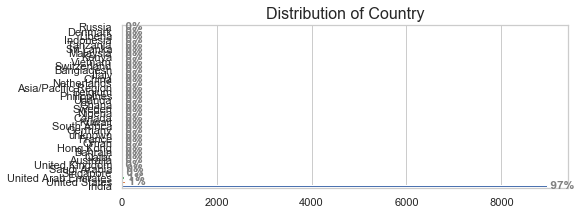

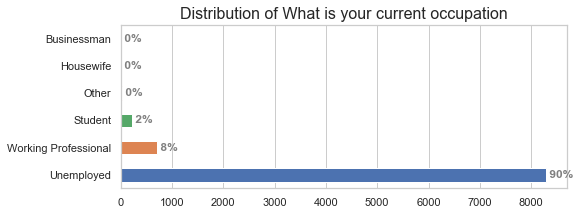

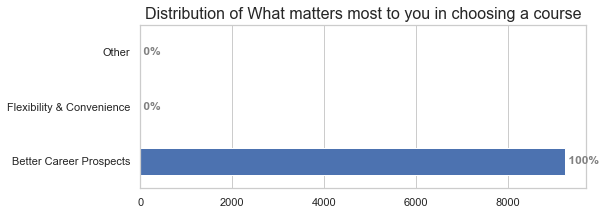

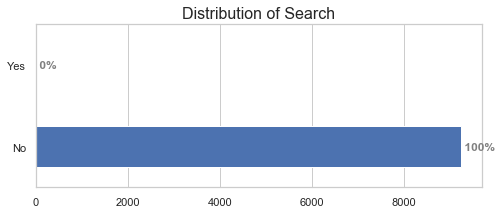

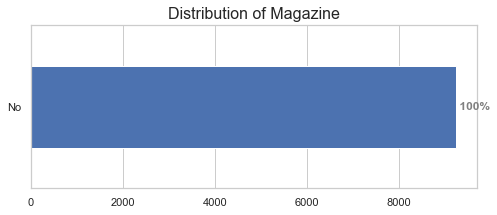

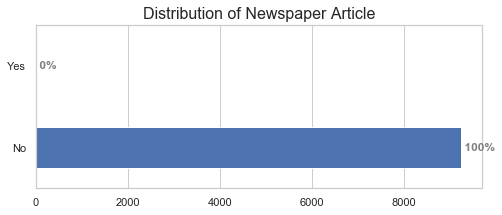

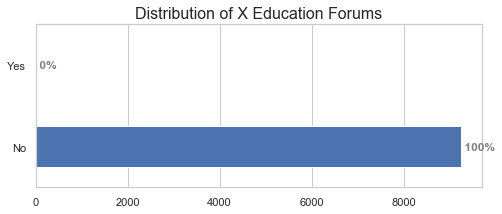

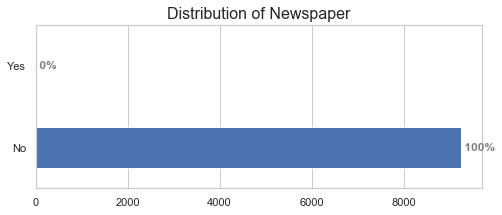

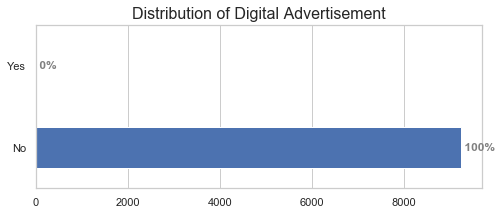

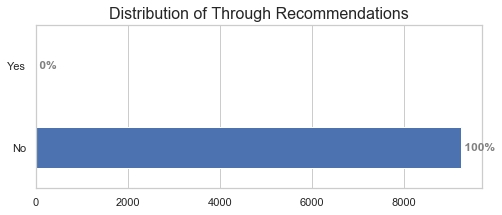

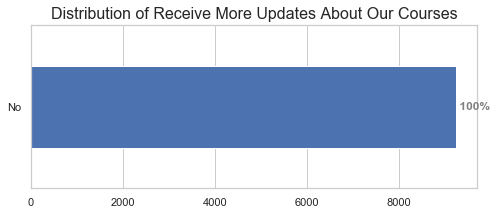

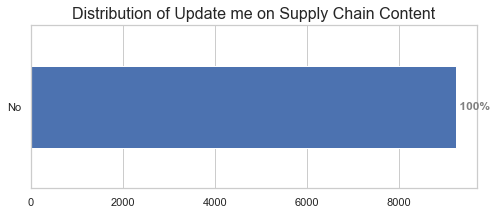

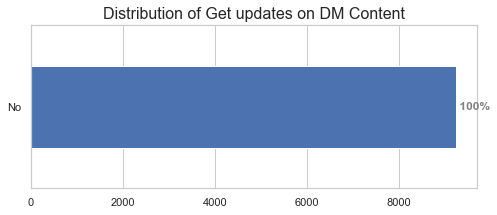

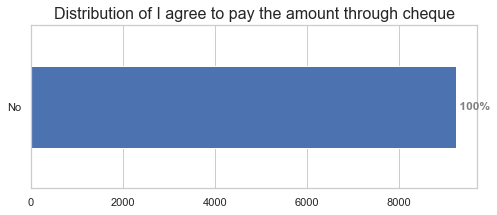

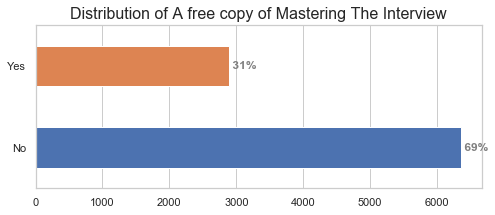

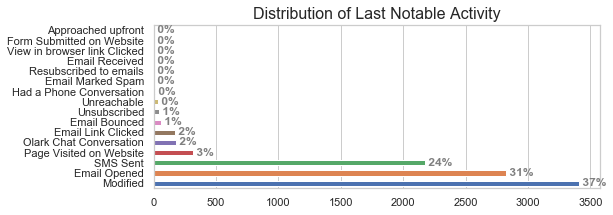

In [28]:
univariate_cat(lead_df)

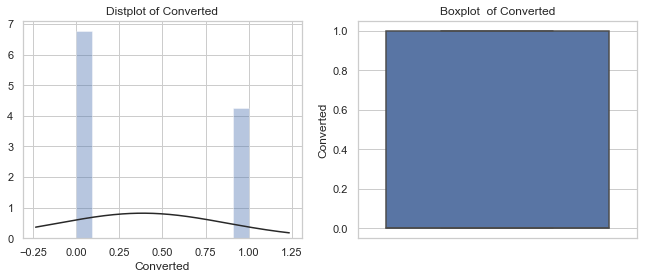

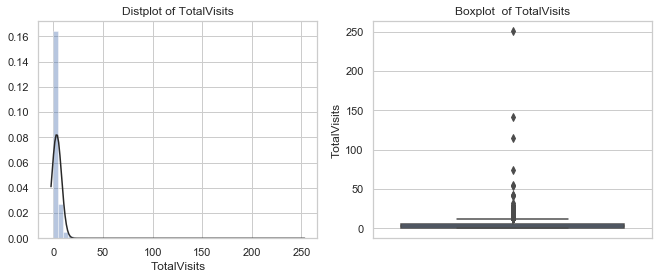

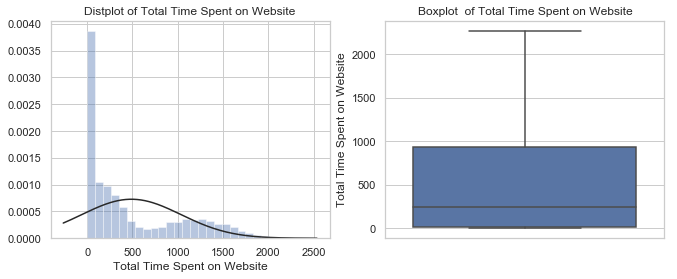

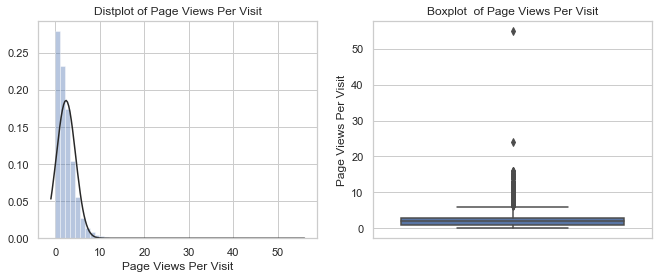

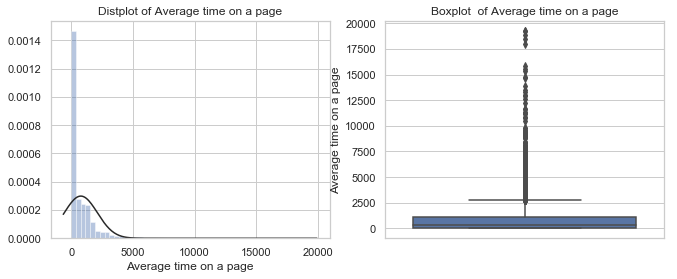

In [29]:
univariate_num(lead_df)

__columns i am interested to drop after Univariate because of imbalance are__
- Do Not Email
- Do Not Call
- Country 
- What is your current occupation
- What matters most to you in choosing a course
- Search
- Magazine
- Newspaper Article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque


In [30]:
#lets drop them
col_del_uni=['Do Not Email','Do Not Call','Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']
for i in col_del_uni:
    lead_df.drop(i,axis=1,inplace=True)
lead_df.shape

(9240, 11)

In [31]:
def segmented_univariate_cat_target(df,TARGET_var):
    Num=['float64','int32','int64']
    outlier_list=['TotalVisits','Page Views Per Visit','Average time on a page']
    num_columns=list(df.select_dtypes(include=Num).columns)
    #num_columns.remove[TARGET_var]
    for i in num_columns:
        sns.set(style="whitegrid")
        fig = plt.figure(figsize=(8, 1))
        print(" The comparision of Avegrages of {} vs Target".format(i))
        if i in outlier_list:
            sns.barplot(y=TARGET_var,x=i,data=df,orient='h',palette="Set2",estimator=np.median,ci=None)
            plt.show()
        else:
            sns.barplot(y=TARGET_var,x=i,data=df,orient='h',palette="Set1",estimator=np.mean,ci=None)
            plt.show()
        
        

 The comparision of Avegrages of Converted vs Target


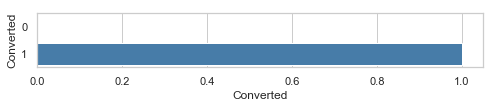

 The comparision of Avegrages of TotalVisits vs Target


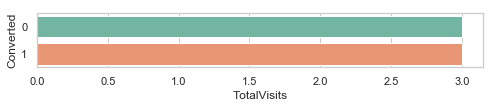

 The comparision of Avegrages of Total Time Spent on Website vs Target


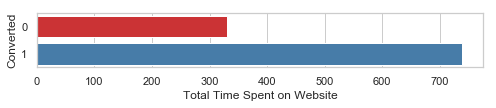

 The comparision of Avegrages of Page Views Per Visit vs Target


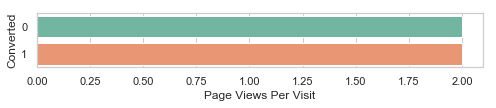

 The comparision of Avegrages of Average time on a page vs Target


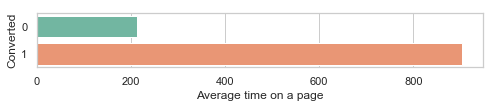

In [32]:
#segmented univariate analysis by comparing averages of numerical variables against the target variable
#We are taking median as an estimator due to presence of outliers
segmented_univariate_cat_target(lead_df,'Converted')

- The average of Total Visit and page view per visit is same for both the outcomes which is not good for the model but not dropping for noe
- The average of "Average time on a page" and 

In [33]:
#Bivaraite Analysis
def bivariate_num(df):
    temp_df=df.select_dtypes(include=['float64','int64'])
    cor=round(temp_df.corr(),2)
    plt.figure(figsize=(6,4))
    ax=plt.axes()
    sns.heatmap(cor,annot=True,fmt='.1f',cmap='coolwarm',ax=ax)
    ax.set_title('Heatmap showing correlated values for the Numerical data')
    plt.show()

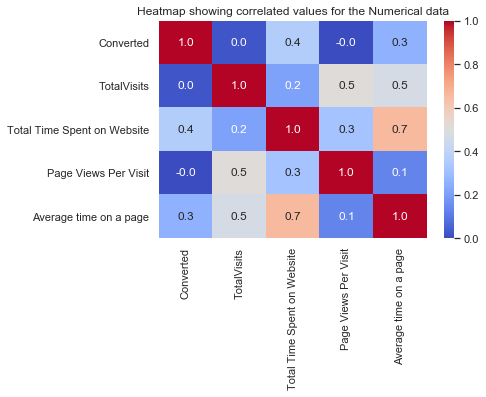

In [34]:
bivariate_num(lead_df)

__Not much collinearity to drop any variables__

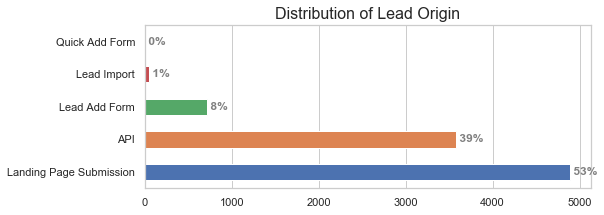

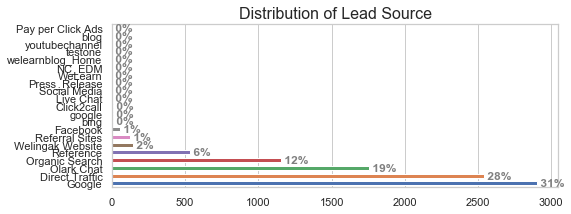

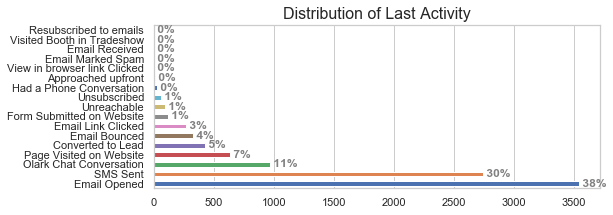

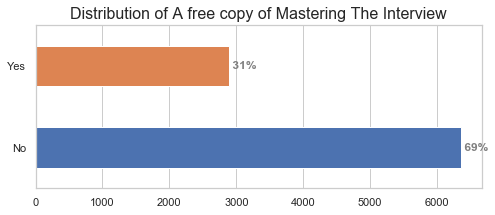

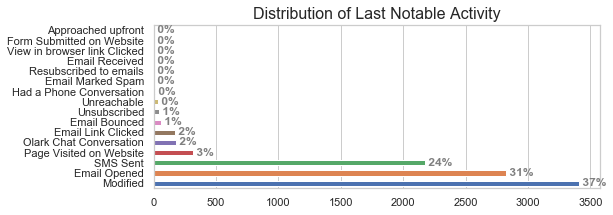

In [35]:
univariate_cat(lead_df)

__As can be seen from  the above distribution both "Last notable activity" and "Last activity" is almost similar apart from the modified field which can be well explained by last activity . So dropping Last Notable Activity__

In [36]:
lead_df.drop('Last Notable Activity',axis=1,inplace=True)

In [37]:
lead_df['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
WeLearn                 1
NC_EDM                  1
welearnblog_Home        1
testone                 1
youtubechannel          1
blog                    1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

__From the above variable we can try grouping them as per below categories__
- search_engine - Google, Organic Search, bing , google
- 'Direct Traffic'
- chat - 'Olark Chat' , 'Live Chat'
- reference - 'Reference'
- social media - 'Facebook','Social Media','youtubechannel'
- others - 'Welingak Website','Referral Sites','Click2call','Press_Release','welearnblog_Home','testone','WeLearn','blog','Pay per Click Ads','NC_EDM'



In [38]:
lead_df['Lead Source']=lead_df['Lead Source'].replace({'Google':'search_engine','bing':'search_engine','google':'search_engine','Organic Search':'search_engine',
                                                       'Click2call':'others','Press_Release':'others','Olark Chat':'chat','Live Chat':'chat','Facebook':'Social Media'
                                                       ,'youtubechannel':'Social Media','Welingak Website':'others','Referral Sites':'others'
                                                    ,'welearnblog_Home':'others','blog':'others','NC_EDM':'others','WeLearn':'others',
                                                  'testone':'others','Pay per Click Ads':'others'})

In [39]:
lead_df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'A free copy of Mastering The Interview', 'Average time on a page'],
      dtype='object')

__We are left with below columns for further analysis__
- 'Lead Origin'
- 'Lead Source'
- 'Converted'
- 'TotalVisits'
- 'Total Time Spent on Website'
- 'Page Views Per Visit'
- 'Last Activity',
- 'A free copy of Mastering The Interview'
- 'Average time on a page'

## For categorical variables  creating dummy features (one-hot encoding)

In [40]:
#creating dummy variables
cat_col=list(lead_df.select_dtypes(include='object').columns)
cat_col.remove('Lead Number')
dummy1=pd.get_dummies(lead_df[cat_col],drop_first=True)
lead_df=pd.concat([lead_df,dummy1],axis=1)
lead_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Average time on a page,...,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes
0,660737,API,chat,0,0.0,0,0.0,Page Visited on Website,No,0.0,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,search_engine,0,5.0,674,2.5,Email Opened,No,1348.0,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Yes,1532.0,...,0,0,0,0,0,0,0,0,0,1
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,No,305.0,...,0,0,0,0,0,1,0,0,0,0
4,660681,Landing Page Submission,search_engine,1,2.0,1428,1.0,Converted to Lead,No,2856.0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#dropping the original cat colums
lead_df.drop(cat_col,axis=1,inplace=True)

In [42]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 9239
Data columns (total 32 columns):
Lead Number                                   9240 non-null object
Converted                                     9240 non-null int64
TotalVisits                                   9240 non-null float64
Total Time Spent on Website                   9240 non-null int64
Page Views Per Visit                          9240 non-null float64
Average time on a page                        9240 non-null float64
Lead Origin_Landing Page Submission           9240 non-null uint8
Lead Origin_Lead Add Form                     9240 non-null uint8
Lead Origin_Lead Import                       9240 non-null uint8
Lead Origin_Quick Add Form                    9240 non-null uint8
Lead Source_Reference                         9240 non-null uint8
Lead Source_Social Media                      9240 non-null uint8
Lead Source_chat                              9240 non-null uint8
Lead Source_others          

In [43]:
#lets keep the copy of our final dataframe befor modelling
backup_df=lead_df.copy()

### Test-Train Split

In [44]:
from sklearn.model_selection import train_test_split
y=lead_df['Converted']
X=lead_df.drop('Converted',axis=1)

In [45]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [46]:
#dropping the lead number in both train and test so as to assign them later 
train_leadnumber=X_train['Lead Number']
test_leadnumber=X_test['Lead Number']
X_train.drop('Lead Number',1,inplace=True)
X_test.drop('Lead Number',1,inplace=True)

### Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
num_col=list(X.select_dtypes(include=['int64','float64']).columns)
num_col

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Average time on a page']

In [49]:
scaler = StandardScaler()
X_train[num_col]=scaler.fit_transform(X_train[num_col])

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\pc\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [50]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Average time on a page,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Reference,Lead Source_Social Media,...,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes
1871,-0.645678,-0.885371,-1.088305,-0.586609,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.109111,0.005716,-0.473232,0.528755,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3516,0.297808,-0.691418,0.067847,-0.425167,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.297808,1.365219,1.223999,0.350056,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3934,-0.645678,-0.885371,-1.088305,-0.586609,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Average time on a page,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Reference,Lead Source_Social Media,...,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,A free copy of Mastering The Interview_Yes
count,6.468000e+03,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,5.489322e-17,-1.609377e-16,-6.797284e-18,-3.352297e-17,0.528139,0.079468,0.005102,0.000155,0.060297,0.005566,...,0.003401,0.102195,0.072047,0.000155,0.300402,0.008813,0.006030,0.000773,0.000155,0.311843
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,0.499246,0.270489,0.071252,0.012434,0.238054,0.074403,...,0.058226,0.302929,0.258586,0.012434,0.458468,0.093468,0.077423,0.027795,0.012434,0.463282
min,-6.456784e-01,-8.853708e-01,-1.088305e+00,-5.866089e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.456784e-01,-8.634138e-01,-6.258442e-01,-5.866089e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-7.958660e-02,-4.352528e-01,-1.633834e-01,-3.710998e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.978079e-01,8.098906e-01,2.990773e-01,2.466802e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.671734e+01,3.271816e+00,2.434704e+01,1.377420e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking correlations

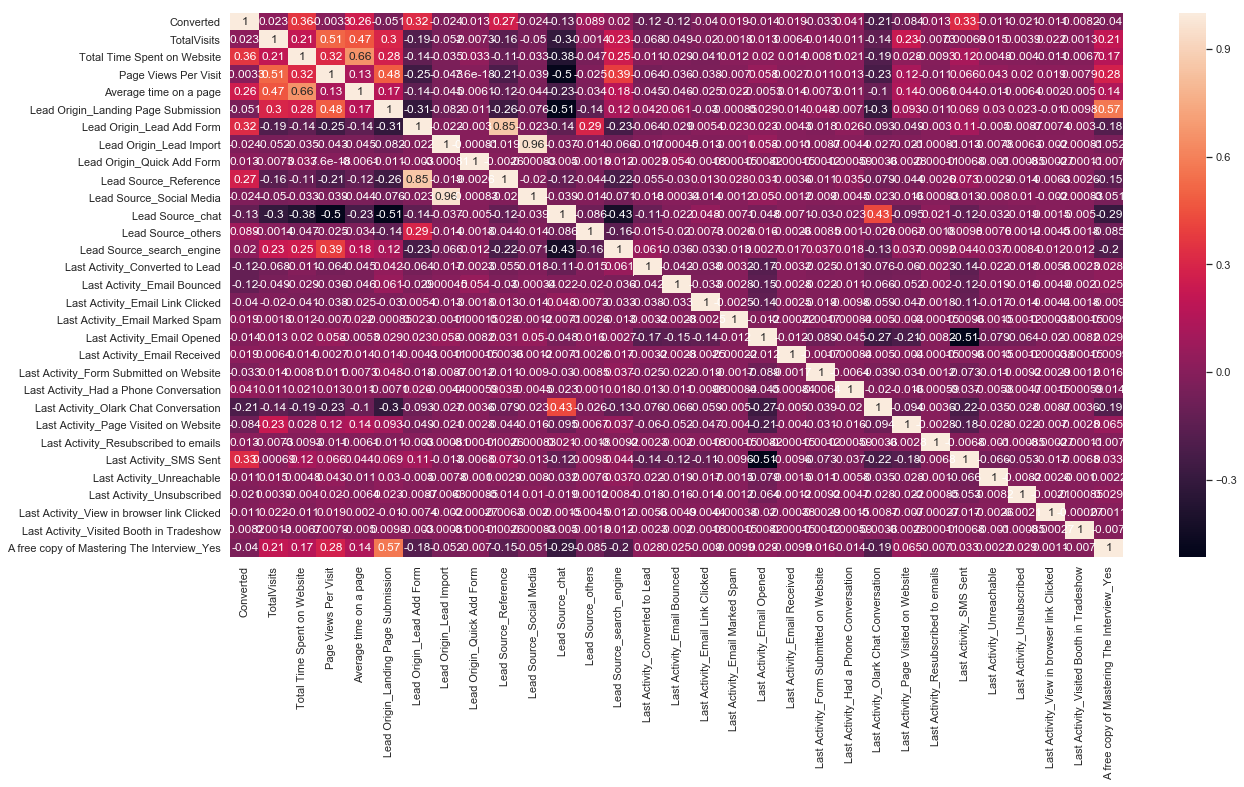

In [52]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_df.corr(),annot = True)
plt.show()

__There is high correlation betweemn__
- Lead Source_Refrence and Lead Origin_Lead Add Form ,so dropping one of them
- Lead Origin_Lead import and Lead Source_Social Media, so dropping on of them



In [53]:
X_train.drop(['Lead Source_Reference','Lead Origin_Lead Import'],axis=1,inplace=True)
X_test.drop(['Lead Source_Reference','Lead Origin_Lead Import'],axis=1,inplace=True)



In [54]:
#Lets backup  our pre model data frame for using later in PCA 


## Model Building

In [93]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2951.9
Date:                Mon, 28 Oct 2019   Deviance:                       5903.7
Time:                        19:32:09   Pearson chi2:                 6.78e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.1415      0.054    -21.208      0.000      -1.247      -1.036
Total Time Spent on Website                1.1149      0.038     29.526      0.000       1.041       1.189
Lead Origin_Lead Add Form                  3.9667      0.176     22.486      0.000       3.621       4.312
Lead Source_chat                           1.1123      0.097     11.416      0.000       0.921       1.303
Last Activity_Converted to Lead           -1.2165      0.206     -5.913      0.000      -1.620      -0.813
Last Activity_Email Bounced               -2.1153      0.289     -7.331      0.000      -2.681      -1.550
Last Activity_Email Link Clicked          -0.5264      0.207     -2.547      0.011      -0.931      -0.121
Last Activity_Had a Phone Conversation     2.0990      0.623      3.371      0.001       0.879       3.319
Last Activity_Olark Chat Conversation     -1.5374      0.159     -9.641      0.000      -1.850      -1.225
Last Activity_Page Visited on Website     -0.6273      0.137     -4.578      0.000      -0.896      -0.359
Last Activity_SMS Sent                     1.0493      0.072     14.477      0.000       0.907       1.191
==========================================================================================================
"""

## RFE

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [57]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 13),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('Average time on a page', False, 2),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Social Media', False, 9),
 ('Lead Source_chat', True, 1),
 ('Lead Source_others', False, 3),
 ('Lead Source_search_engine', False, 4),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Marked Spam', False, 8),
 ('Last Activity_Email Opened', False, 11),
 ('Last Activity_Email Received', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_Resubscribed to emails', True, 1),
 ('Last Activity_SMS Sent

In [59]:
col = X_train.columns[rfe.support_]

In [60]:
#These are the columns which are not important to the model as per RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Average time on a page',
       'Lead Origin_Landing Page Submission', 'Lead Source_Social Media',
       'Lead Source_others', 'Lead Source_search_engine',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Unreachable',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'A free copy of Mastering The Interview_Yes'],
      dtype='object')

### Using statsmodel for continuing the columns we got from RFE

In [61]:
X_train=X_train[col]

In [62]:
#Model 2
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2945.7
Date:                Mon, 28 Oct 2019   Deviance:                       5891.4
Time:                        18:14:15   Pearson chi2:                 6.78e+03
No. Iterations:                    20   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.1205      0.055    -20.466      0.000      -1.228      -1.013
Total Time Spent on Website                 1.1135      0.038     29.448      0.000       1.039       1.188
Lead Origin_Lead Add Form                   3.9658      0.177     22.457      0.000       3.620       4.312
Lead Origin_Quick Add Form                 21.3257   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_chat                            1.1033      0.097     11.322      0.000       0.912       1.294
Last Activity_Converted to Lead            -1.2367      0.206     -6.005      0.000      -1.640      -0.833
Last Activity_Email Bounced                -2.1702      0.295     -7.367      0.000      -2.748      -1.593
Last Activity_Email Link Clicked           -0.5445      0.207     -2.632      0.008      -0.950      -0.139
Last Activity_Email Received               21.6779      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Last Activity_Form Submitted on Website    -0.5845      0.313     -1.868      0.062      -1.198       0.029
Last Activity_Had a Phone Conversation      2.0779      0.623      3.338      0.001       0.858       3.298
Last Activity_Olark Chat Conversation      -1.5527      0.160     -9.724      0.000      -1.866      -1.240
Last Activity_Page Visited on Website      -0.6469      0.137     -4.709      0.000      -0.916      -0.378
Last Activity_Resubscribed to emails       22.5691   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Last Activity_SMS Sent                      1.0298      0.073     14.081      0.000       0.886       1.173
Last Activity_Unsubscribed                 -0.5711      0.434     -1.315      0.188      -1.422       0.280
===========================================================================================================
"""

In [63]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF():
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [64]:
VIF()

,Features,VIF
3,Lead Source_chat,1.59
10,Last Activity_Olark Chat Conversation,1.37
0,Total Time Spent on Website,1.20
13,Last Activity_SMS Sent,1.15
1,Lead Origin_Lead Add Form,1.12
6,Last Activity_Email Link Clicked,1.02
2,Lead Origin_Quick Add Form,1.01
5,Last Activity_Email Bounced,1.01
11,Last Activity_Page Visited on Website,1.01
4,Last Activity_Converted to Lead,1.00


In [65]:
#from above model we can drop "Last Activity_Email Received" as it is having highest P value
X_train.drop('Last Activity_Email Received',1,inplace=True)

In [66]:
#model 3 
logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2947.2
Date:                Mon, 28 Oct 2019   Deviance:                       5894.4
Time:                        18:14:16   Pearson chi2:                 6.78e+03
No. Iterations:                    19   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.1179      0.055    -20.436      0.000      -1.225      -1.011
Total Time Spent on Website                 1.1141      0.038     29.465      0.000       1.040       1.188
Lead Origin_Lead Add Form                   3.9650      0.177     22.453      0.000       3.619       4.311
Lead Origin_Quick Add Form                 20.3239   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_chat                            1.1024      0.097     11.315      0.000       0.911       1.293
Last Activity_Converted to Lead            -1.2396      0.206     -6.019      0.000      -1.643      -0.836
Last Activity_Email Bounced                -2.1729      0.295     -7.376      0.000      -2.750      -1.596
Last Activity_Email Link Clicked           -0.5466      0.207     -2.642      0.008      -0.952      -0.141
Last Activity_Form Submitted on Website    -0.5872      0.313     -1.877      0.061      -1.200       0.026
Last Activity_Had a Phone Conversation      2.0754      0.623      3.333      0.001       0.855       3.296
Last Activity_Olark Chat Conversation      -1.5545      0.160     -9.735      0.000      -1.867      -1.242
Last Activity_Page Visited on Website      -0.6497      0.137     -4.730      0.000      -0.919      -0.380
Last Activity_Resubscribed to emails       21.5680   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Activity_SMS Sent                      1.0273      0.073     14.053      0.000       0.884       1.171
Last Activity_Unsubscribed                 -0.5736      0.434     -1.321      0.187      -1.425       0.277
===========================================================================================================
"""

In [67]:
# dropping "Lead Origin_Quick Add Form" as it having highest P value
X_train.drop("Lead Origin_Quick Add Form",1,inplace=True)

In [68]:
#model 4
logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2947.8
Date:                Mon, 28 Oct 2019   Deviance:                       5895.6
Time:                        18:14:16   Pearson chi2:                 6.78e+03
No. Iterations:                    19   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.1184      0.055    -20.440      0.000      -1.226      -1.011
Total Time Spent on Website                 1.1155      0.038     29.520      0.000       1.041       1.190
Lead Origin_Lead Add Form                   3.9648      0.177     22.461      0.000       3.619       4.311
Lead Source_chat                            1.1036      0.097     11.328      0.000       0.913       1.295
Last Activity_Converted to Lead            -1.2400      0.206     -6.019      0.000      -1.644      -0.836
Last Activity_Email Bounced                -2.1377      0.289     -7.403      0.000      -2.704      -1.572
Last Activity_Email Link Clicked           -0.5464      0.207     -2.640      0.008      -0.952      -0.141
Last Activity_Form Submitted on Website    -0.5875      0.313     -1.877      0.060      -1.201       0.026
Last Activity_Had a Phone Conversation      2.0760      0.623      3.334      0.001       0.855       3.297
Last Activity_Olark Chat Conversation      -1.5544      0.160     -9.734      0.000      -1.867      -1.241
Last Activity_Page Visited on Website      -0.6500      0.137     -4.731      0.000      -0.919      -0.381
Last Activity_Resubscribed to emails       21.5685   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Last Activity_SMS Sent                      1.0275      0.073     14.052      0.000       0.884       1.171
Last Activity_Unsubscribed                 -0.5737      0.434     -1.321      0.187      -1.425       0.278
===========================================================================================================
"""

In [69]:
# dropping "Last Activity_Resubscribed to emails" as it having highest P value
X_train.drop("Last Activity_Resubscribed to emails",1,inplace=True)

In [70]:
#model 5
logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2949.1
Date:                Mon, 28 Oct 2019   Deviance:                       5898.2
Time:                        18:14:16   Pearson chi2:                 6.78e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.1174      0.055    -20.429      0.000      -1.225      -1.010
Total Time Spent on Website                 1.1154      0.038     29.516      0.000       1.041       1.189
Lead Origin_Lead Add Form                   3.9646      0.177     22.460      0.000       3.619       4.311
Lead Source_chat                            1.1078      0.097     11.378      0.000       0.917       1.299
Last Activity_Converted to Lead            -1.2409      0.206     -6.024      0.000      -1.645      -0.837
Last Activity_Email Bounced                -2.1390      0.289     -7.408      0.000      -2.705      -1.573
Last Activity_Email Link Clicked           -0.5487      0.207     -2.652      0.008      -0.954      -0.143
Last Activity_Form Submitted on Website    -0.5889      0.313     -1.882      0.060      -1.202       0.024
Last Activity_Had a Phone Conversation      2.0750      0.623      3.332      0.001       0.854       3.296
Last Activity_Olark Chat Conversation      -1.5583      0.160     -9.760      0.000      -1.871      -1.245
Last Activity_Page Visited on Website      -0.6512      0.137     -4.740      0.000      -0.920      -0.382
Last Activity_SMS Sent                      1.0260      0.073     14.034      0.000       0.883       1.169
Last Activity_Unsubscribed                 -0.5751      0.434     -1.324      0.185      -1.426       0.276
===========================================================================================================
"""

In [71]:
#dropping "Last Activity_Unsubscribed" as it having highest P value
X_train.drop('Last Activity_Unsubscribed',1,inplace=True)

In [72]:
#model 6
logm6 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2950.0
Date:                Mon, 28 Oct 2019   Deviance:                       5900.0
Time:                        18:14:16   Pearson chi2:                 6.78e+03
No. Iterations:                     6   Covariance Type:             nonrobust
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.1254      0.054    -20.679      0.000      -1.232      -1.019
Total Time Spent on Website                 1.1154      0.038     29.523      0.000       1.041       1.189
Lead Origin_Lead Add Form                   3.9617      0.176     22.457      0.000       3.616       4.308
Lead Source_chat                            1.1087      0.097     11.390      0.000       0.918       1.300
Last Activity_Converted to Lead            -1.2329      0.206     -5.987      0.000      -1.637      -0.829
Last Activity_Email Bounced                -2.1307      0.289     -7.382      0.000      -2.696      -1.565
Last Activity_Email Link Clicked           -0.5408      0.207     -2.615      0.009      -0.946      -0.136
Last Activity_Form Submitted on Website    -0.5810      0.313     -1.857      0.063      -1.194       0.032
Last Activity_Had a Phone Conversation      2.0830      0.623      3.345      0.001       0.863       3.303
Last Activity_Olark Chat Conversation      -1.5509      0.160     -9.719      0.000      -1.864      -1.238
Last Activity_Page Visited on Website      -0.6433      0.137     -4.686      0.000      -0.912      -0.374
Last Activity_SMS Sent                      1.0339      0.073     14.184      0.000       0.891       1.177
===========================================================================================================
"""

In [73]:
#dropping "Last Activity_Form Submitted on Website" as it is having high p value
X_train.drop('Last Activity_Form Submitted on Website',1,inplace=True)

In [74]:
#model 7
logm7 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm7.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2951.9
Date:                Mon, 28 Oct 2019   Deviance:                       5903.7
Time:                        18:14:16   Pearson chi2:                 6.78e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.1415      0.054    -21.208      0.000      -1.247      -1.036
Total Time Spent on Website                1.1149      0.038     29.526      0.000       1.041       1.189
Lead Origin_Lead Add Form                  3.9667      0.176     22.486      0.000       3.621       4.312
Lead Source_chat                           1.1123      0.097     11.416      0.000       0.921       1.303
Last Activity_Converted to Lead           -1.2165      0.206     -5.913      0.000      -1.620      -0.813
Last Activity_Email Bounced               -2.1153      0.289     -7.331      0.000      -2.681      -1.550
Last Activity_Email Link Clicked          -0.5264      0.207     -2.547      0.011      -0.931      -0.121
Last Activity_Had a Phone Conversation     2.0990      0.623      3.371      0.001       0.879       3.319
Last Activity_Olark Chat Conversation     -1.5374      0.159     -9.641      0.000      -1.850      -1.225
Last Activity_Page Visited on Website     -0.6273      0.137     -4.578      0.000      -0.896      -0.359
Last Activity_SMS Sent                     1.0493      0.072     14.477      0.000       0.907       1.191
==========================================================================================================
"""

In [75]:
VIF()

,Features,VIF
2,Lead Source_chat,1.58
7,Last Activity_Olark Chat Conversation,1.37
0,Total Time Spent on Website,1.20
9,Last Activity_SMS Sent,1.15
1,Lead Origin_Lead Add Form,1.12
5,Last Activity_Email Link Clicked,1.02
4,Last Activity_Email Bounced,1.01
8,Last Activity_Page Visited on Website,1.01
3,Last Activity_Converted to Lead,1.00
6,Last Activity_Had a Phone Conversation,1.00


__The above model looks good lets check the metrices__

In [76]:
fm=logm7.fit()

In [77]:
y_train_pred=fm.predict((sm.add_constant(X_train))).values.reshape(-1)

In [90]:
y_train_pred

array([0.26572722, 0.24321025, 0.30999009, ..., 0.26572722, 0.0541836 ,
       0.26572722])

In [89]:
type(y_train_pred)

numpy.ndarray

In [91]:
y_train.values

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [80]:
X_train.shape

(6468, 10)

In [81]:
#creating a data frame with actual converted vs predicted converted values

model_df=pd.DataFrame({"Converted":y_train.values,'Converted_prob':y_train_pred})
model_df.head()

,Converted,Converted_prob
0,0,0.265727
1,0,0.243210
2,0,0.309990
3,0,0.806890
4,0,0.265727


In [82]:
from sklearn import metrics

In [83]:
#Lets plot ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

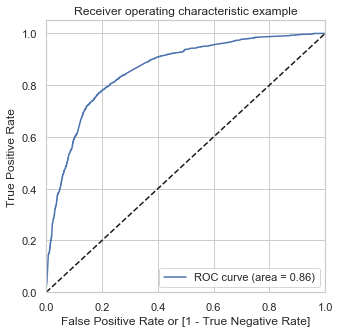

In [84]:
draw_roc(model_df.Converted, model_df.Converted_prob)

In [85]:
"{:2.2f}".format(metrics.roc_auc_score(model_df.Converted, model_df.Converted_prob))

'0.86'

__An AUC of 0.86 is pretty good__

### Finding Optimal Cutoff Point

In [511]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    model_df[i]= model_df.Converted_prob.map(lambda x: 1 if x > i else 0)
model_df.head()

,Converted,Converted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.265727,1,1,1,0,0,0,0,0,0,0
1,0,0.243210,1,1,1,0,0,0,0,0,0,0
2,0,0.309990,1,1,1,1,0,0,0,0,0,0
3,0,0.806890,1,1,1,1,1,1,1,1,1,0
4,0,0.265727,1,1,1,0,0,0,0,0,0,0


In [512]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    cm1 = metrics.confusion_matrix(model_df.Converted, model_df[i] )
    total1=sum(sum(cm1))     #sum makes a sum column wise and the next sum will add it to total.
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.556895  0.977291  0.297851
0.2   0.2  0.704700  0.915247  0.574963
0.3   0.3  0.775974  0.820762  0.748376
0.4   0.4  0.797464  0.743309  0.830835
0.5   0.5  0.797464  0.675994  0.872314
0.6   0.6  0.773036  0.546229  0.912794
0.7   0.7  0.755720  0.457421  0.939530
0.8   0.8  0.725108  0.336577  0.964518
0.9   0.9  0.674861  0.167478  0.987506


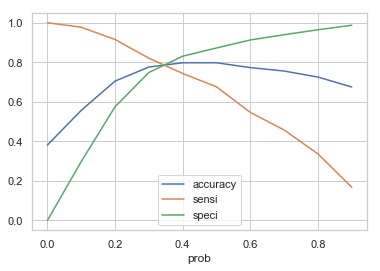

In [513]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [514]:
model_df['final_predicted'] = model_df.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

model_df.head()

,Converted,Converted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.265727,1,1,1,0,0,0,0,0,0,0,0
1,0,0.243210,1,1,1,0,0,0,0,0,0,0,0
2,0,0.309990,1,1,1,1,0,0,0,0,0,0,1
3,0,0.806890,1,1,1,1,1,1,1,1,1,0,1
4,0,0.265727,1,1,1,0,0,0,0,0,0,0,0


In [515]:
cutoff_df.loc[0.3,]

prob        0.300000
accuracy    0.775974
sensi       0.820762
speci       0.748376
Name: 0.3, dtype: float64

__These are the metrices obtained after having cutoff of 3 in train__
- Accuracy - 0.78
- Sensitivity - 0.82
- Specificity - 0.75

##  Making predictions on the test set

__Scaling the Y train__

In [516]:
X_test[num_col]=scaler.transform(X_test[num_col])

In [517]:
X_test=X_test[X_train.columns]

In [518]:
y_test_pred=fm.predict(sm.add_constant(X_test))

In [519]:
test_model_df=pd.DataFrame({"Converted_test":y_test.values,'Converted_prob_test':y_test_pred})
test_model_df.head()

,Converted_test,Converted_prob_test
4269,1,0.727735
2376,1,0.947217
7766,1,0.118334
9199,0,0.072174
4359,1,0.862713


In [520]:
test_model_df['final_prediction']=test_model_df.Converted_prob_test.map(lambda x: 1 if x > 0.3 else 0)
test_model_df.head()

,Converted_test,Converted_prob_test,final_prediction
4269,1,0.727735,1
2376,1,0.947217,1
7766,1,0.118334,0
9199,0,0.072174,0
4359,1,0.862713,1


In [521]:
metrics.accuracy_score(test_model_df.Converted_test, test_model_df.final_prediction)

0.7741702741702742

In [522]:
confusion_test = metrics.confusion_matrix(test_model_df.Converted_test, test_model_df.final_prediction )
confusion_test

array([[1251,  426],
       [ 200,  895]], dtype=int64)

In [523]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [524]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.817351598173516

In [525]:
# Let us calculate specificity
TN / float(TN+FP)

0.7459749552772809

__These are the metrices obtained after having cutoff of 3 in test__
- Accuracy - 0.77
- Sensitivity - 0.82
- Specificity - 0.75

__Most important Variables are__
- Lead Orgin - Lead Add Form
- Last Activity - Had a Phone Conversation
- Total Time spent on the website 

## Lets explore this using PCA 

In [526]:
X_train.shape

(6468, 10)

-  We have 10 variables after creating our dummy variables for our categories

In [527]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [528]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [529]:
pca.components_

array([[ 9.79710585e-01, -3.32261052e-02, -1.67456078e-01,
        -1.66660225e-03, -3.00811152e-03, -9.93493564e-03,
         1.42510381e-03, -7.38081659e-02,  7.72976737e-03,
         7.34962817e-02],
       [-1.22063776e-01,  1.56565551e-01, -2.38976897e-01,
        -5.06438842e-02, -4.22950766e-02, -3.23280246e-02,
        -3.66931413e-03, -2.47789876e-01, -1.05983454e-01,
         9.08533515e-01],
       [ 1.35602601e-01, -1.69587288e-01,  7.87344172e-01,
        -1.14968435e-01, -5.22534477e-02, -1.64551222e-02,
        -4.43484823e-03,  4.12503406e-01, -1.82954615e-01,
         3.36260594e-01],
       [ 3.99198102e-02,  7.02632534e-01, -1.71709716e-01,
        -1.06140591e-02,  5.63029478e-03, -5.61601966e-03,
         6.80152775e-03,  4.54235440e-01, -5.09203144e-01,
        -9.69013319e-02],
       [ 4.95688305e-02,  5.80940717e-01,  2.37116433e-01,
        -3.39749015e-01, -8.61171608e-02, -1.12593416e-02,
         8.88561292e-04, -4.13876265e-02,  6.92036955e-01,
         1.

In [530]:
pca.explained_variance_ratio_

array([0.60670257, 0.13107785, 0.08961294, 0.04126543, 0.03695857,
       0.03484679, 0.02416128, 0.01909576, 0.01430488, 0.00197391])

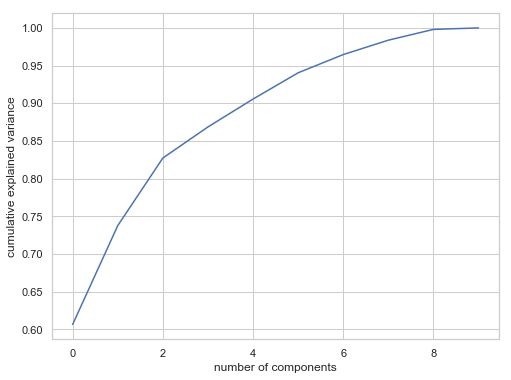

In [531]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

__Five components are able to explain around 95% of the variance in the data__

In [532]:
#Lets select 5 components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [533]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(6468, 5)

In [534]:
#Applying selected components to the test data - 5 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2772, 5)

### Applying a logistic regression on our Principal Components

In [535]:
#Training the model on the train data

log_pca = LogisticRegression()
model_pca = log_pca.fit(df_train_pca,y_train)

In [536]:
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.85'

In [537]:
#using stats model
logpca = sm.GLM(y_train,(sm.add_constant(df_train_pca)), family = sm.families.Binomial())
logpca.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6462
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3027.7
Date:                Mon, 26 Aug 2019   Deviance:                       6055.4
Time:                        13:48:55   Pearson chi2:                 6.57e+03
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6117      0.033    -18.423      0.000      -0.677      -0.547
x1             0.9567      0.033     29.123      0.000       0.892       1.021
x2             1.6980      0.070     24.174      0.000       1.560       1.836
x3             0.4194      0.093      4.527      0.000       0.238       0.601
x4             3.5278      0.163     21.579      0.000       3.207       3.848
x5            -2.1256      0.151    -14.091      0.000      -2.421      -1.830
==============================================================================
"""

In [538]:
fm=logpca.fit()

In [539]:
y_train_pred=fm.predict((sm.add_constant(df_train_pca)))

In [540]:
pca_model_df=pd.DataFrame({"Converted":y_train.values,'Converted_prob':y_train_pred})
pca_model_df.head()

,Converted,Converted_prob
0,0,0.219449
1,0,0.196042
2,0,0.258440
3,0,0.812093
4,0,0.219449


In [541]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    cm1 = metrics.confusion_matrix(pca_model_df.Converted, model_df[i] )
    total1=sum(sum(cm1))     #sum makes a sum column wise and the next sum will add it to total.
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.556895  0.977291  0.297851
0.2   0.2  0.704700  0.915247  0.574963
0.3   0.3  0.775974  0.820762  0.748376
0.4   0.4  0.797464  0.743309  0.830835
0.5   0.5  0.797464  0.675994  0.872314
0.6   0.6  0.773036  0.546229  0.912794
0.7   0.7  0.755720  0.457421  0.939530
0.8   0.8  0.725108  0.336577  0.964518
0.9   0.9  0.674861  0.167478  0.987506


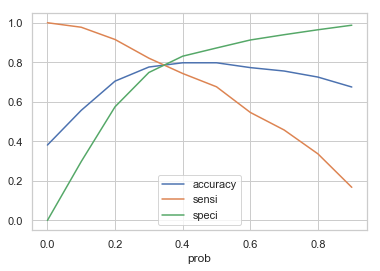

In [542]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [543]:
pca_model_df['final_predicted_pca'] = pca_model_df.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

pca_model_df.head()

,Converted,Converted_prob,final_predicted_pca
0,0,0.219449,0
1,0,0.196042,0
2,0,0.258440,0
3,0,0.812093,1
4,0,0.219449,0


In [544]:
confusion_train_pca = metrics.confusion_matrix(pca_model_df.Converted, pca_model_df.final_predicted_pca )
confusion_train_pca

array([[2936, 1066],
       [ 440, 2026]], dtype=int64)

In [545]:
TP = confusion_train_pca[1,1] # true positive 
TN = confusion_train_pca[0,0] # true negatives
FP = confusion_train_pca[0,1] # false positives
FN = confusion_train_pca[1,0] # false negatives

In [546]:
metrics.accuracy_score(pca_model_df.Converted, pca_model_df.final_predicted_pca)

0.7671614100185529

In [547]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)


0.8215733982157339

In [548]:
# Let us calculate specificity
TN / float(TN+FP)

0.7336331834082959

__These are the metrices obtained after having cutoff of 3 using PCA__
- Accuracy - 0.77
- Sensitivity - 0.82
- Specificity - 0.73

__The result obtained from the PCA is very similar to the model which we made without PCA.So its better to drop the model with PCA as there is no interpretability.So the model which we build earlier(without PCA- model7) is our final model__

## Lets find out the lead scores

In [549]:
model_df.head()

,Converted,Converted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.265727,1,1,1,0,0,0,0,0,0,0,0
1,0,0.243210,1,1,1,0,0,0,0,0,0,0,0
2,0,0.309990,1,1,1,1,0,0,0,0,0,0,1
3,0,0.806890,1,1,1,1,1,1,1,1,1,0,1
4,0,0.265727,1,1,1,0,0,0,0,0,0,0,0


In [550]:
#dropping the columns 0.0 to 0.9 in model_df
for i in range(10):
    model_df.drop(i/10,1,inplace=True)

In [551]:
model_df.head()

,Converted,Converted_prob,final_predicted
0,0,0.265727,0
1,0,0.243210,0
2,0,0.309990,1
3,0,0.806890,1
4,0,0.265727,0


In [552]:
model_df['Lead Number']=list(train_leadnumber)
model_df.head()

,Converted,Converted_prob,final_predicted,Lead Number
0,0,0.265727,0,641410
1,0,0.243210,0,597687
2,0,0.309990,1,626825
3,0,0.806890,1,587928
4,0,0.265727,0,622366


In [553]:
test_model_df.head()

,Converted_test,Converted_prob_test,final_prediction
4269,1,0.727735,1
2376,1,0.947217,1
7766,1,0.118334,0
9199,0,0.072174,0
4359,1,0.862713,1


In [556]:
#Lets rename the test_model_df so that will be easy to concat with the model_df
test_model_df.rename(columns={'Converted_test':'Converted','Converted_prob_test':'Converted_prob','final_prediction':'final_predicted'},inplace =True)

In [557]:
test_model_df.head()

,Converted,Converted_prob,final_predicted
4269,1,0.727735,1
2376,1,0.947217,1
7766,1,0.118334,0
9199,0,0.072174,0
4359,1,0.862713,1


In [558]:
#concating both the train and test df which contain the probabilities
final_df=pd.concat([model_df,test_model_df],axis=0)

In [559]:
final_df.head()

,Converted,Converted_prob,Lead Number,final_predicted
0,0,0.265727,641410.0,0
1,0,0.243210,597687.0,0
2,0,0.309990,626825.0,1
3,0,0.806890,587928.0,1
4,0,0.265727,622366.0,0


In [561]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9240 entries, 0 to 2960
Data columns (total 4 columns):
Converted          9240 non-null int64
Converted_prob     9240 non-null float64
Lead Number        6468 non-null float64
final_predicted    9240 non-null int64
dtypes: float64(2), int64(2)
memory usage: 360.9 KB


In [562]:
final_df.shape

(9240, 4)

In [563]:
final_df['Lead Score']=round(final_df['Converted_prob']*100,0)

In [564]:
final_df.head()

,Converted,Converted_prob,Lead Number,final_predicted,Lead Score
0,0,0.265727,641410.0,0,27.0
1,0,0.243210,597687.0,0,24.0
2,0,0.309990,626825.0,1,31.0
3,0,0.806890,587928.0,1,81.0
4,0,0.265727,622366.0,0,27.0
